<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 10 - Quantum Key Distribution - Part 1</h3>
<h3>Lab notebook</h3>

</div>

## Coding cheat sheet:

### Defining a quantum circuit: 

`qc = QuantumCircuit(1)` # Define a 1 qubit quantum circuit <br>
`qc = QuantumCircuit(1,1)` # Define a 1 qubit quantum circuit with 1 classical bit (Only for QASM simulator or real Quantum Computer) <br>

`qc.x(0)` #Add an X gate <br>
`qc.h(0)` #Add an H gate <br>
`qc.z(0)` #Add a Z gate <br>

`qc.measure(0,0)` # Add measurement to circuit (Only for QASM simulator or real Quantum Computer) <br>

`qc.draw()` # Draw the circuit <br>


### Set up and run the statevector simulator:<br>

`backend = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>

### Set up and run the QASM simulator:<br>

`backend = Aer.get_backend('qasm_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend, shots = 1024)` # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use<br>
`result = job.result()` <br>


### See the output in vector form (only for Statevector simulator):<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

### See the output in histogram form (for Statevector, QASM, or real quantum computer): <br>
`counts = result.get_counts()` <br>
`plot_histogram(counts)` <br>


In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!

# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute, IBMQ 
from qiskit.visualization import *


import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

provider = IBMQ.load_account()
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Block 1- CODING CHALLENGE 1
# Alice is performing QKD, and has randomly generated a bit and a basis. 
# The bit Alice has is 0, and the basis is X. 
# Can you implement a Qiskit circuit that will encode the right qubit state to send to Bob?
qc = QuantumCircuit(1,1)
qc.h(0)
qc.draw()

┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

In [4]:
# Block 2 - CODING CHALLENGE 2
# Alice has sent the qubit from Coding Challenge 1 to Bob. 
# Now, Bob (randomly) decides to make a measurement in the X basis on this qubit. How should Bob implement this measurement? 
# Also draw your final circuit
qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

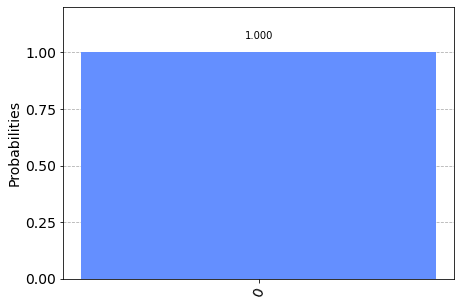

In [7]:
# Block 3 - CODING CHALLENGE 2 contd.
# Simulate this circuit using QASM, with shots = 1. Do you get the expected bit?
backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(qc,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [13]:
# Block 4 - CODING CHALLENGE 3
# Now, Alice wants to write code that would work for ANY combination of bit and basis. 
# Can you help Alice? Alice should be able to run the same code to generate the right circuit for a specific combination of bit and basis. 
# You can test your code with different combinations of bit and basis by drawing the circuit

bit = '1' # After you implement the code, change the bit and see if your code still creates the right circuit!
basis = 'Z' # After you implement the code, change the basis and see if your code still creates the right circuit!

qc = QuantumCircuit(1,1)

def decode(basis, bit):
    qc = QuantumCircuit(1,1)
    if basis == 'Z':
        if bit == '1':
            qc.x(0)
    elif basis == 'X':
        if bit == '0':
            qc.h(0)
        elif bit == '1':
            qc.x(0)
            qc.h(0)
    return(qc)

qc = decode(basis, bit)
qc.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

In [27]:
# Block 5 - (OPTIONAL) CODING CHALLENGE 4
# Now, Alice has a list of bits and a list of bases, both randomly generated. 
# Alice wants to generate a list of quantum circuits corresponding to each pair of bit and basis values.  
# Can you write code to go through these lists, make a new circuit for each pair of bits and bases, 
# add the right gates, and add the circuit to the list? Some of the code is written out for you.

alice_bits = ['1','0','0','1','1'] # list of random bits Alice has generated
alice_bases = ['X','Z', 'X', 'X', 'Z'] # list of random bases Alice has generated
qc_list = [] # List that will store the circuit for each qubit Alice has to send to Bob

for i in range (0,len(alice_bits)):
    qc = decode(alice_bases[i], alice_bits[i])
    qc_list.append(qc)

In [ ]:
# Block 6 - (OPTIONAL) CODING CHALLENGE 5
# Use the list of qubits from Coding Challenge 4, along with Bob’s list of bases, write code to decide how Bob should measure each qubit using the list of bases.
bob_bases = ['Z', 'Z', 'X', 'Z', 'X']

for i in range (0,len(bob_bases)):
    if bob_bases == 'X':
        qc_list[i].h(0)
    qc_list[i].measure(0,0)